In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta
import utils
import config
import inspect
import folium
from dateutil import relativedelta

def class_to_df(cfg_class):
    class_name = cfg_class.__name__
    attributes = [attr for attr in dir(cfg_class) if not callable(getattr(cfg_class, attr)) and not attr.startswith("__")]
    data = {attr: [getattr(cfg_class, attr)] for attr in attributes}
    data['class_name'] = [class_name]
    return pd.DataFrame(data)

In [2]:
class CFG:
    make_folder = True
    note_num = "StackingOpt/result2001"
    seed = 42


OUTPUT_DIR = f'H:/study/output/{CFG.note_num}/'

if CFG.make_folder:
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)


# オプティカルフローの予測精度

In [41]:
id_all_data = pd.read_csv("H:\study\output\StackingOpt\EDA006\id_all_data.csv")

In [19]:
#　データの期間
start_date = "201308150000"
end_date = "201408010000"
data_list = utils.create_time_series_data(start_date,end_date)

# 使用するid
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]
to_unique_id = [str(num).zfill(10) for num in unique_id]

In [16]:
save_files = []
for i,date in enumerate(data_list):
    save_file = pd.read_csv('H:/study/output/StackingOpt/EDA006/'+f"pred_id_all_data_{date}.csv")
    save_files.append(save_file)
    #break
save_files = pd.concat(save_files)
save_files["datetime"] = pd.to_datetime(save_files["datetime"])
save_files2 = save_files[save_files.id.isin(unique_id)]

In [58]:
df = utils.get_preprocessing_data3(to_unique_id)
df = df.groupby('id').apply(utils.prev_30m_generation).reset_index(level=0, drop=True)
df.dropna(subset=["year","prev_30m_generation"],inplace=True)
df["datetime"] = pd.to_datetime(df["datetime"])
df2 = df[df.id.isin(unique_id)]

In [59]:
df3 = df2.merge(save_files,on=["id","datetime"],how="left")
df3 = df3[~((df3.hour==6)&(df3.minute==30))]
df3["pred_interpolated*two_weeks_max"] = df3["pred_interpolated"]*df3["two_weeks_max"]
df3["observed_max2"] = df3["id"].map(dict(zip(id_all_data["id"],id_all_data["observed_max2"])))
df3["APE"] = (df3["generation"]-df3["pred_interpolated*two_weeks_max"]).abs()/df3["observed_max2"]*100
df3["APE_prev"] = (df3["generation"]-df3["prev_30m_generation"]).abs()/df3["observed_max2"]*100

In [69]:
print(f'全期間_MAPE: opt {df3["APE"].mean()}, prev {df3["APE_prev"].mean()}')
for month,group in df3.groupby("month"):
    print(f'{month}月_MAPE: opt {group["APE"].mean()}, prev {group["APE_prev"].mean()}')

全期間_MAPE: opt 5.482937120801739, prev 7.396414042652795
1.0月_MAPE: opt 4.724282444735459, prev 6.58483036778166
2.0月_MAPE: opt 4.8665646930795425, prev 6.390662522294983
3.0月_MAPE: opt 5.439738230286578, prev 7.880258286843257
4.0月_MAPE: opt 4.844017286607008, prev 7.6268549842111915
5.0月_MAPE: opt 5.173993743008585, prev 7.876264905181537
6.0月_MAPE: opt 7.04441064624235, prev 8.458728366389993
7.0月_MAPE: opt 7.025094338057923, prev 8.69211117447725
8.0月_MAPE: opt 6.033329192686938, prev 8.08978159023126
9.0月_MAPE: opt 5.569503956118731, prev 7.875330001574701
10.0月_MAPE: opt 5.187494856169183, prev 6.505333756320217
11.0月_MAPE: opt 5.1805837116867135, prev 6.788239271854509
12.0月_MAPE: opt 4.917946507092591, prev 6.241908367203384


In [74]:
data = id_all_data[id_all_data.id.isin(unique_id)]
# 地図の中心座標を設定 (ここでは最初の緯度・経度)
map_center = data.iloc[0][['id_lat', 'id_lng']].tolist()

# 地図を生成
m = folium.Map(location=map_center, zoom_start=6)

# 各地点にマーカーを追加
for _, row in data.iterrows():
    folium.Marker([row['id_lat'], row['id_lng']]).add_to(m)

m

# LGBM2001

- observed_max2ではなくobserved_maxを保存していた（学習にはobserved_max2を使用）

実験1　- 6月学習、7月テスト

- CFG1とCFG2よりオプティカルフローの予測値は有効
- 予測精度は CFG2<オプティカルフロー<CFG1

In [2]:
config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(1, 3)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")


In [3]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG1,0.092159,0.064622,0.092320,0.064394,config.py,StackingOpt/LGBM2001/CFG1,201408010000,201407010000,201407010000,201406010000
1,CFG2,0.103737,0.076520,0.103733,0.076553,config.py,StackingOpt/LGBM2001/CFG2,201408010000,201407010000,201407010000,201406010000


In [4]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']].sort_values(by="test_mae")

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG1,0.092159,0.064622,0.092320,0.064394,config.py,StackingOpt/LGBM2001/CFG1,201408010000,201407010000,201407010000,201406010000
1,CFG2,0.103737,0.076520,0.103733,0.076553,config.py,StackingOpt/LGBM2001/CFG2,201408010000,201407010000,201407010000,201406010000


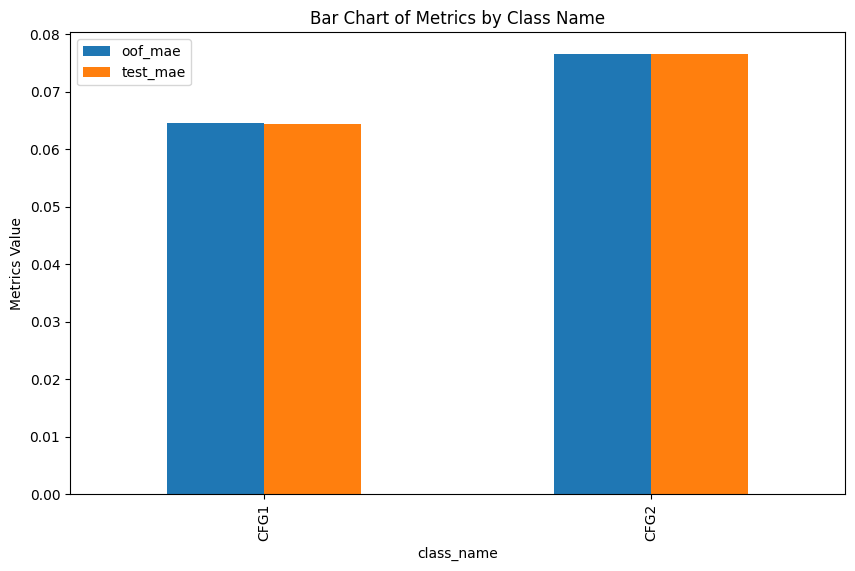

In [5]:
ax = combined_df.plot.bar(x='class_name', y=['oof_mae','test_mae'], figsize=(10, 6))
ax.set_ylabel('Metrics Value')
ax.set_title('Bar Chart of Metrics by Class Name')
plt.show()


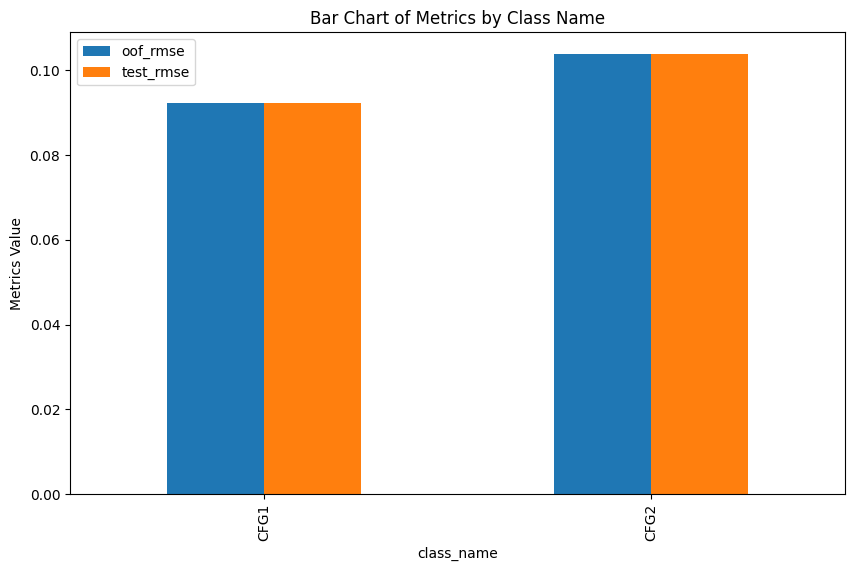

In [6]:
ax = combined_df.plot.bar(x='class_name', y=['oof_rmse', 'test_rmse'], figsize=(10, 6))
ax.set_ylabel('Metrics Value')
ax.set_title('Bar Chart of Metrics by Class Name')
plt.show()


# LGBM2002

実験2 - 実験1と同条件(6月学習、7月テスト)

- (目的) オプティカルフローのように全国のPVデータ（ただし4885台)で学習して予測精度を比較

In [7]:
# 評価対象のPV
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

In [8]:
config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(1, 4)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)
    oof = oof[oof.id.isin(unique_id)]
    print(oof.shape)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")


(547170, 7)
(547170, 7)
(547170, 7)


In [9]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG1,0.092159,0.064622,0.092320,0.064394,config.py,StackingOpt/LGBM2001/CFG1,201408010000,201407010000,201407010000,201406010000
1,CFG2,0.103737,0.076520,0.103733,0.076553,config.py,StackingOpt/LGBM2001/CFG2,201408010000,201407010000,201407010000,201406010000
2,CFG3,0.102267,0.074543,0.101740,0.073579,config.py,StackingOpt/LGBM2002/CFG3,201408010000,201407010000,201407010000,201406010000


実験3,実験1,2でデータ期間を3か月にする

<結果>　データ期間を3か月にすると精度が上がる。ただし、オプティカルフローの方が精度が高い。

(6月学習、7月テスト)

CFG1 : オプ有り　390台

CFG2 : オプ無し　390台

CFG3 : オプ無し, 4885台

(4~6月学習,7月テスト)

CFG4 : オプ有り 390台

CFG5 : オプ無し 390台

CFG6 : オプ無し, 4885台

In [4]:
# 評価対象のPV
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(1, 7)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)
    oof = oof[oof.id.isin(unique_id)]
    print(oof.shape)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")



(547170, 7)
(547170, 7)
(547170, 7)
(1094340, 7)
(1094340, 7)
(1094340, 7)


In [5]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG1,0.092159,0.064622,0.092320,0.064394,config.py,StackingOpt/LGBM2001/CFG1,201408010000,201407010000,201407010000,201406010000
1,CFG2,0.103737,0.076520,0.103733,0.076553,config.py,StackingOpt/LGBM2001/CFG2,201408010000,201407010000,201407010000,201406010000
2,CFG3,0.102267,0.074543,0.101740,0.073579,config.py,StackingOpt/LGBM2002/CFG3,201408010000,201407010000,201407010000,201406010000
3,CFG4,0.078011,0.050516,0.089919,0.061899,config.py,StackingOpt/LGBM2002/CFG4,201408010000,201407010000,201407010000,201404010000
4,CFG5,0.090432,0.062301,0.102868,0.074867,config.py,StackingOpt/LGBM2002/CFG5,201408010000,201407010000,201407010000,201404010000
5,CFG6,0.089464,0.060849,0.101745,0.072723,config.py,StackingOpt/LGBM2002/CFG6,201408010000,201407010000,201407010000,201404010000


実験4,実験1,2でデータ期間を5か月にする

<結果>　データ期間を3か月にすると精度が上がる。ただし、オプティカルフローの方が精度が高い。

(6月学習、7月テスト)

CFG1 : オプ有り　390台

CFG2 : オプ無し　390台

CFG3 : オプ無し, 4885台

(4~6月学習,7月テスト)

CFG4 : オプ有り 390台

CFG5 : オプ無し 390台

CFG6 : オプ無し, 4885台

(2~6月学習,7月テスト)

CFG7 : オプ有り 390台

CFG8 : オプ無し 390台

CFG9 : オプ無し, 4885台

In [2]:
# 評価対象のPV
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(1, 10)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)
    oof = oof[oof.id.isin(unique_id)]
    print(oof.shape)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")



(547170, 7)
(547170, 7)
(547170, 7)
(1094340, 7)
(1094340, 7)
(1094340, 7)
(1623570, 7)
(1623570, 7)
(1623570, 7)


In [3]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG1,0.092159,0.064622,0.092320,0.064394,config.py,StackingOpt/LGBM2001/CFG1,201408010000,201407010000,201407010000,201406010000
1,CFG2,0.103737,0.076520,0.103733,0.076553,config.py,StackingOpt/LGBM2001/CFG2,201408010000,201407010000,201407010000,201406010000
2,CFG3,0.102267,0.074543,0.101740,0.073579,config.py,StackingOpt/LGBM2002/CFG3,201408010000,201407010000,201407010000,201406010000
3,CFG4,0.078011,0.050516,0.089919,0.061899,config.py,StackingOpt/LGBM2002/CFG4,201408010000,201407010000,201407010000,201404010000
4,CFG5,0.090432,0.062301,0.102868,0.074867,config.py,StackingOpt/LGBM2002/CFG5,201408010000,201407010000,201407010000,201404010000
5,CFG6,0.089464,0.060849,0.101745,0.072723,config.py,StackingOpt/LGBM2002/CFG6,201408010000,201407010000,201407010000,201404010000
6,CFG7,0.075856,0.048232,0.089769,0.061730,config.py,StackingOpt/LGBM2002/CFG7,201408010000,201407010000,201407010000,201402010000
7,CFG8,0.089011,0.060731,0.101015,0.070961,config.py,StackingOpt/LGBM2002/CFG8,201408010000,201407010000,201407010000,201402010000
8,CFG9,0.088169,0.058374,0.100670,0.070318,config.py,StackingOpt/LGBM2002/CFG9,201408010000,201407010000,201407010000,201402010000


実験5,実験1~4でテストデータを6月にする。

In [2]:
# 評価対象のPV
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(10, 19)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)
    oof = oof[oof.id.isin(unique_id)]
    print(oof.shape)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")



(547170, 7)
(547170, 7)
(547170, 7)
(1094340, 7)
(1094340, 7)
(1094340, 7)
(1623570, 7)
(1623570, 7)
(1623570, 7)


In [4]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG10,0.075478,0.048576,0.091201,0.062925,config.py,StackingOpt/LGBM2001/CFG10,201407010000,201406010000,201406010000,201405010000
1,CFG11,0.091096,0.061325,0.101761,0.072966,config.py,StackingOpt/LGBM2001/CFG11,201407010000,201406010000,201406010000,201405010000
2,CFG12,0.089223,0.059584,0.101721,0.072401,config.py,StackingOpt/LGBM2002/CFG12,201407010000,201406010000,201406010000,201405010000
3,CFG13,0.073812,0.045656,0.089221,0.061362,config.py,StackingOpt/LGBM2002/CFG13,201407010000,201406010000,201406010000,201403010000
4,CFG14,0.086727,0.058192,0.102059,0.070761,config.py,StackingOpt/LGBM2002/CFG14,201407010000,201406010000,201406010000,201403010000
5,CFG15,0.086117,0.056168,0.100125,0.069409,config.py,StackingOpt/LGBM2002/CFG15,201407010000,201406010000,201406010000,201403010000
6,CFG16,0.072327,0.045379,0.089528,0.061640,config.py,StackingOpt/LGBM2002/CFG16,201407010000,201406010000,201406010000,201401010000
7,CFG17,0.083819,0.055821,0.099435,0.069401,config.py,StackingOpt/LGBM2002/CFG17,201407010000,201406010000,201406010000,201401010000
8,CFG18,0.082013,0.053306,0.099761,0.069404,config.py,StackingOpt/LGBM2002/CFG18,201407010000,201406010000,201406010000,201401010000


実験6,実験1~4でテストデータを5月にする。

In [2]:
# 評価対象のPV
unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

config_note_name = "config.py"
# 使用するCFGクラス名を指定
usecfg = [f"CFG{i}" for i in range(19, 28)]

# configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
combined_df["config_note_name"] = config_note_name 

scores = []
oof_list = []
for _oof_path in combined_df.note_num:
    oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
    oof = pd.read_csv(oof_path)
    oof = oof[oof.id.isin(unique_id)]
    print(oof.shape)

    score_df = pd.DataFrame({"note_num": [_oof_path]})
    for fold,group in oof.groupby("fold"):
        rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
        mae = utils.compute_mae(group["pred"], group["nv2"])
        if fold=="test":
            score_df[f"test_rmse"] = [rmse]
            score_df[f"test_mae"] = [mae]
        else:
            score_df[f"fold{fold}_rmse"] = [rmse]
            score_df[f"fold{fold}_mae"] = [mae]
    score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
    score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
    scores.append(score_df)

scores = pd.concat(scores)
combined_df = combined_df.merge(scores,on="note_num",how="left")



(547170, 7)
(547170, 7)
(547170, 7)
(1076400, 7)
(1076400, 7)
(1076400, 7)
(1632540, 7)
(1632540, 7)
(1632540, 7)


In [3]:
combined_df[['class_name','oof_rmse', 'oof_mae',"test_rmse","test_mae", 'config_note_name',"note_num",'test_end_date', 'test_start_date', 'train_end_date',
       'train_start_date']]

,class_name,oof_rmse,oof_mae,test_rmse,test_mae,config_note_name,note_num,test_end_date,test_start_date,train_end_date,train_start_date
0,CFG19,0.073150,0.046337,0.076079,0.050114,config.py,StackingOpt/LGBM2001/CFG19,201406010000,201405010000,201405010000,201404010000
1,CFG20,0.088134,0.060239,0.095984,0.072904,config.py,StackingOpt/LGBM2001/CFG20,201406010000,201405010000,201405010000,201404010000
2,CFG21,0.084585,0.055844,0.095963,0.072705,config.py,StackingOpt/LGBM2002/CFG21,201406010000,201405010000,201405010000,201404010000
3,CFG22,0.072789,0.044790,0.074365,0.049022,config.py,StackingOpt/LGBM2002/CFG22,201406010000,201405010000,201405010000,201402010000
4,CFG23,0.086480,0.058727,0.093804,0.070463,config.py,StackingOpt/LGBM2002/CFG23,201406010000,201405010000,201405010000,201402010000
5,CFG24,0.084066,0.055734,0.088567,0.064413,config.py,StackingOpt/LGBM2002/CFG24,201406010000,201405010000,201405010000,201402010000
6,CFG25,0.070590,0.043266,0.075479,0.050822,config.py,StackingOpt/LGBM2002/CFG25,201406010000,201405010000,201405010000,201312010000
7,CFG26,0.080252,0.051845,0.092436,0.068669,config.py,StackingOpt/LGBM2002/CFG26,201406010000,201405010000,201405010000,201312010000
8,CFG27,0.080832,0.051363,0.090612,0.066977,config.py,StackingOpt/LGBM2002/CFG27,201406010000,201405010000,201405010000,201312010000


# 実験1~6のまとめ

In [3]:
# # 評価対象のPV
# unique_id = [6240000001, 1670000003, 6310000002, 6310000001, 6900000114, 6900000110, 6900000109, 6900000108, 6900000105, 6900000104, 6900000094, 6900000093, 6900000090, 2100000086, 2100000085, 2100000084, 6900000081, 6900000080, 2100000068, 2100000067, 2100000066, 6910000449, 6910000448, 6900000131, 6950000001, 6900000173, 6900000134, 6900000171, 6900000168, 6900000166, 6900000165, 6900000162, 6900000161, 6900000158, 6910000541, 6900000156, 6900000155, 6900000154, 6900000153, 6900000152, 6900000150, 6900000149, 6900000145, 6900000144, 6900000143, 6900000142, 6630000003, 6630000002, 6910000438, 6900000054, 6900000049, 6900000047, 6910000327, 6910000308, 6910000306, 6910000303, 6910000301, 6910000299, 6910000298, 6910000294, 6910000293, 6910000292, 6910000291, 6910000287, 6910000283, 6910000282, 6910000281, 6910000279, 6910000276, 1730000020, 6910000274, 6910000272, 6910000271, 6910000343, 2420000001, 6900000002, 2070000002, 6900000045, 6900000044, 6900000041, 6900000040, 6900000035, 6900000034, 6900000029, 6900000028, 6900000025, 6900000021, 6900000003, 6900000020, 6900000019, 6900000014, 6900000013, 6900000012, 6900000011, 6900000010, 6100000001, 2900000002, 6900000172, 6900000199, 1730000007, 6620000076, 6620000062, 6620000056, 6620000055, 6620000045, 6620000022, 1660000013, 1660000012, 1660000017, 1660000016, 6780000011, 2460000014, 1660000006, 2460000012, 2460000011, 1660000005, 2460000009, 2460000008, 2460000007, 2460000006, 2460000005, 2460000002, 6620000063, 6620000079, 6900000200, 6620000082, 6620000152, 6620000151, 6620000145, 2030000007, 2190000001, 1710000005, 2350000002, 2190000003, 2030000004, 6030000003, 2190000002, 2350000001, 6620000101, 6620000098, 6620000097, 6620000096, 6620000095, 6620000093, 6620000092, 6620000091, 6620000085, 2460000001, 3000000211, 6090000064, 3000000184, 6840000007, 6840000006, 6840000005, 6840000004, 1400000005, 1240000005, 1400000004, 1240000003, 6900000250, 6900000244, 6900000242, 6900000240, 6900000238, 6900000223, 6900000221, 6900000220, 6900000215, 6900000214, 6900000210, 6900000205, 6900000202, 6900000268, 6900000269, 6900000275, 3000000137, 1750000008, 3000000173, 3000000172, 1770000018, 1770000016, 10000014, 3000000141, 3000000139, 1290000008, 1610000008, 6900000279, 1610000002, 6570000002, 1930000001, 3000000127, 6040000097, 6040000078, 6040000077, 6040000068, 6900000298, 6240000006, 6910000265, 6910000262, 1010000297, 5000000129, 5000000128, 1160000113, 5000000105, 1160000101, 1160000059, 564, 1160000040, 1160000033, 5000000023, 1160000020, 2440000014, 2760000005, 5000000001, 6760000001, 2110000003, 6070000097, 1010000353, 6070000096, 6070000074, 1010000324, 5000000130, 6010000002, 6010000003, 1690000042, 1160000200, 1690000069, 1690000066, 1210000067, 1210000066, 1210000065, 1160000190, 1160000188, 1690000054, 1690000041, 1210000005, 1690000033, 1690000030, 1160000156, 1690000027, 1210000018, 6650000011, 1210000010, 1210000009, 1210000006, 1010000298, 6070000038, 1160000227, 1270000038, 6180000002, 6180000001, 2340000001, 1010000110, 1010000105, 1010000098, 1010000088, 1010000058, 1010000048, 1010000032, 1010000029, 6130000007, 1810000005, 2450000003, 2450000002, 2130000001, 1010000002, 2130000002, 2450000001, 2720000013, 2720000011, 6180000003, 1010000137, 6500000013, 6550000001, 1750000010, 1270000016, 1270000015, 1270000014, 2390000005, 2390000004, 2390000003, 2390000002, 6550000002, 2230000003, 6500000014, 2230000002, 2230000001, 6710000004, 6710000002, 2070000003, 6710000001, 2070000001, 6340000019, 6500000015, 1690000098, 6620000159, 2540000001, 6910000132, 1840000001, 6910000129, 6910000128, 6910000127, 6910000121, 6910000120, 6910000119, 6910000116, 6910000080, 6910000076, 6910000069, 6910000067, 6910000065, 6910000063, 6910000060, 6910000056, 6910000054, 6910000051, 6910000047, 6910000044, 6910000041, 1840000003, 1840000002, 6910000021, 6910000134, 6910000260, 1570000001, 6910000256, 6910000255, 6910000169, 6910000167, 6910000161, 6910000160, 6910000159, 6910000158, 6910000155, 6910000154, 6910000153, 6910000152, 6910000150, 6910000148, 6910000145, 6910000144, 6910000140, 6910000137, 6910000135, 6910000038, 6910000029, 1160000299, 6700000001, 1160000321, 6910000020, 1690000168, 1690000167, 1690000164, 1160000291, 1690000158, 1690000156, 1160000284, 1740000001, 1690000155, 1160000272, 1690000143, 1690000142, 1690000140, 1580000005, 1690000129, 1580000004, 1580000003, 1690000206, 2010000132, 1690000209, 6910000002, 6910000018, 1900000002, 2390000001, 6910000017, 6910000016, 2110000004, 6910000004, 6910000003, 6910000001, 2430000001, 6860000001, 6590000002, 6590000001, 2430000006, 2430000005, 2430000004, 2430000003, 2430000002, 6700000002]

# config_note_name = "config.py"
# # 使用するCFGクラス名を指定
# usecfg = [f"CFG{i}" for i in range(1, 28)]

# # configモジュール内のCFG接頭辞を持つすべてのクラスを取得し、使用するクラスだけをリストに追加
# cfg_list = [cls for name, cls in inspect.getmembers(config, inspect.isclass) if name.startswith("CFG") and name in usecfg]

# # すべてのCFGクラスをデータフレームに変換し、リストに追加して結合
# combined_df = pd.concat([class_to_df(cfg_class) for cfg_class in cfg_list], ignore_index=True)
# combined_df["config_note_name"] = config_note_name 

# scores = []
# oof_list = []
# for _oof_path in combined_df.note_num:
#     oof_path = "H:/study/output/" + _oof_path + "/oof.csv"
#     oof = pd.read_csv(oof_path)
#     oof = oof[oof.id.isin(unique_id)]
#     print(oof.shape)

#     score_df = pd.DataFrame({"note_num": [_oof_path]})
#     for fold,group in oof.groupby("fold"):
#         rmse = np.sqrt(utils.compute_mse(group["pred"], group["nv2"]))
#         mae = utils.compute_mae(group["pred"], group["nv2"])
#         if fold=="test":
#             score_df[f"test_rmse"] = [rmse]
#             score_df[f"test_mae"] = [mae]
#         else:
#             score_df[f"fold{fold}_rmse"] = [rmse]
#             score_df[f"fold{fold}_mae"] = [mae]
#     score_df["oof_rmse"] = np.sqrt(utils.compute_mse(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"]))
#     score_df["oof_mae"] = utils.compute_mae(oof.loc[oof.fold!="test","pred"], oof.loc[oof.fold!="test","nv2"])
#     scores.append(score_df)

# scores = pd.concat(scores)
# combined_df = combined_df.merge(scores,on="note_num",how="left")
# combined_df.to_csv(OUTPUT_DIR+"combined_df_all.csv",index=False)


(547170, 7)
(547170, 7)
(547170, 7)
(547170, 7)
(1094340, 7)
(1094340, 7)
(1094340, 7)
(1623570, 7)
(1623570, 7)
(1623570, 7)
(547170, 7)
(547170, 7)
(547170, 7)
(547170, 7)
(1076400, 7)
(1076400, 7)
(1076400, 7)
(1632540, 7)
(1632540, 7)
(1632540, 7)
(547170, 7)
(1094340, 7)
(1094340, 7)
(1094340, 7)
(1623570, 7)
(1623570, 7)
(1623570, 7)


In [13]:
combined_df = pd.read_csv(OUTPUT_DIR+"combined_df_all.csv")

combined_df = utils.get_result1(combined_df)
combined_df = combined_df[["class_name","load_data_kind","use_flo_unique_features","oof_mae","test_mae","duration_months","test_month"]].fillna("load_data2")

フロー無し(4885台),フロー無し(390台)、フロー有り(390台)をそれぞれ別々に比較。

学習データ1ヵ月<3ヵ月だが、3ヵ月<5ヵ月とは限らない→おそらくバリデーションの問題

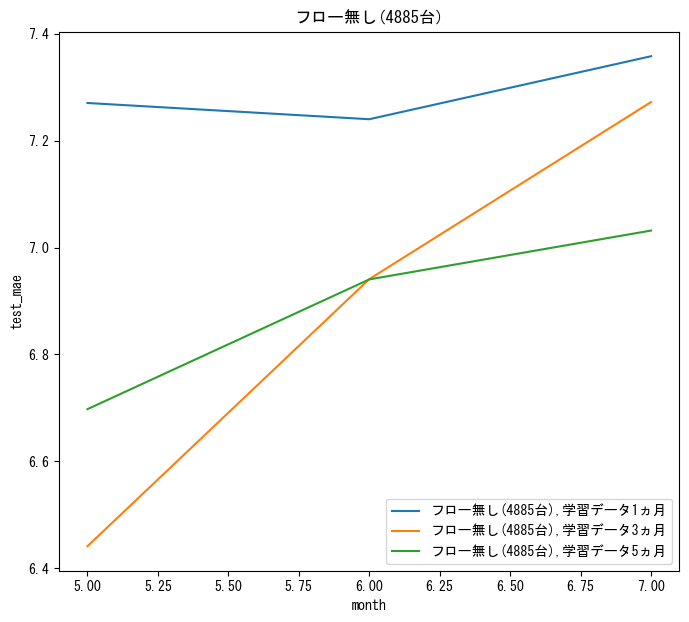

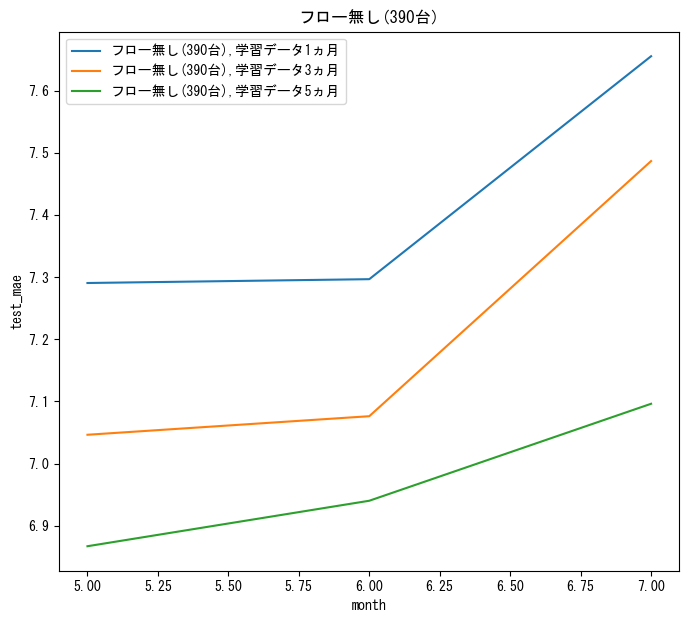

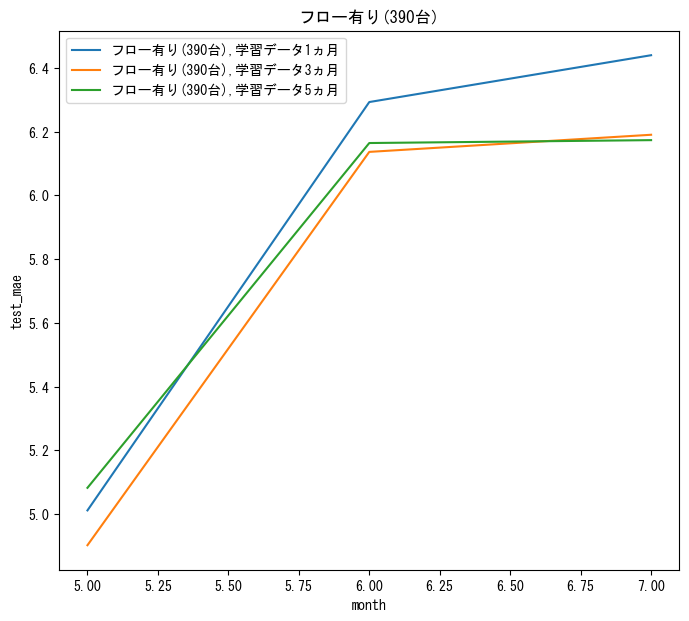

In [68]:
for (kind,flo),group in combined_df.groupby(['load_data_kind', 'use_flo_unique_features']):
    fig = plt.figure(figsize=(8,7))
    for duration,group2 in group.groupby('duration_months'):
        if flo:
            label1 = "有り"
        else:
            label1 = "無し"
        if kind == "load_data1":
            label2 = "4885"
        elif kind == "load_data2":
            label2 = "390"

        group2.sort_values(by="test_month",inplace=True)
        label = f"フロー{label1}({label2}台),学習データ{duration}ヵ月"
        plt.rcParams['font.family'] = 'MS Gothic'
        plt.plot(group2["test_month"],group2["test_mae"]*100,label=label)

    plt.title(f"フロー{label1}({label2}台)")
    plt.xlabel("month")
    plt.ylabel("test_mae")
    plt.legend()
    plt.show()

学習データ別に検証

全てのデータ期間において、フロー無し(390台)<フロー無し(4885台)<フローあり(390台)

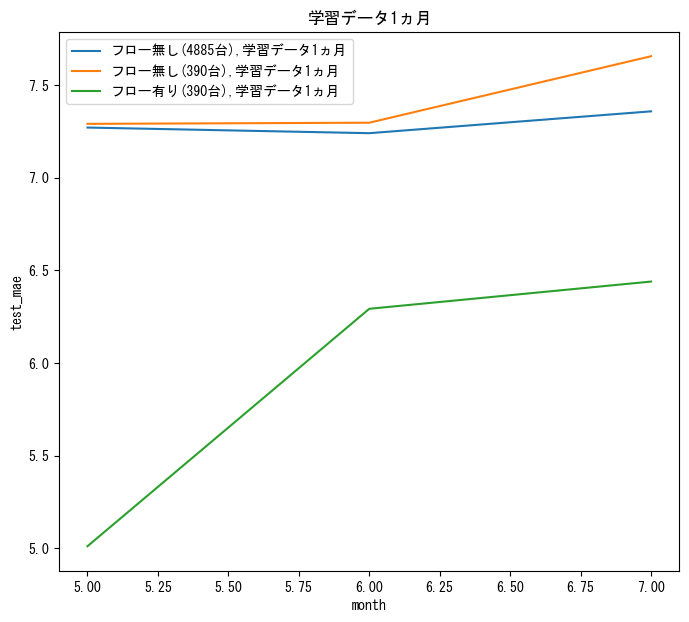

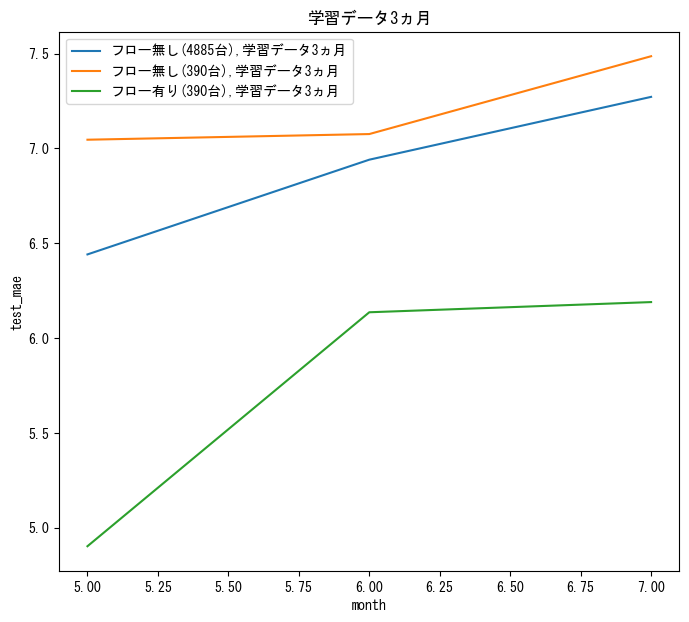

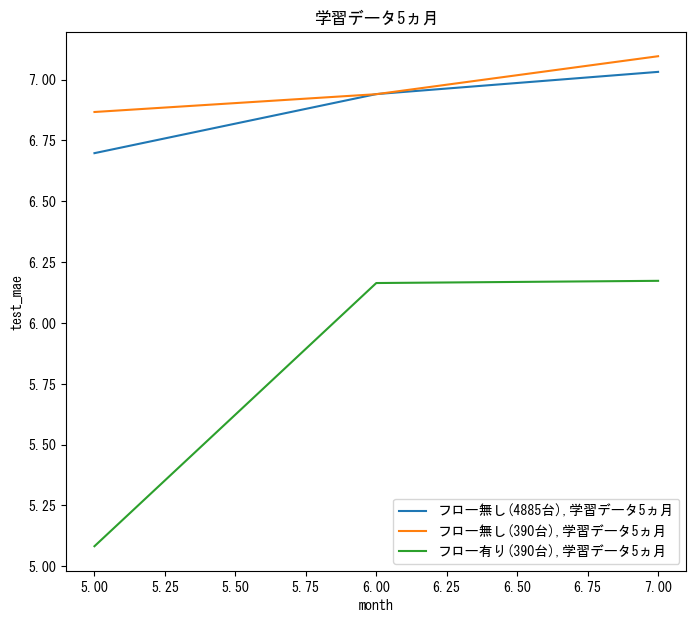

In [75]:
for duration,group in combined_df.groupby('duration_months'):
    fig = plt.figure(figsize=(8,7))
    for (kind,flo),group2 in group.groupby(['load_data_kind', 'use_flo_unique_features']):
        if flo:
            label1 = "有り"
        else:
            label1 = "無し"
        if kind == "load_data1":
            label2 = "4885"
        elif kind == "load_data2":
            label2 = "390"

        group2.sort_values(by="test_month",inplace=True)
        label = f"フロー{label1}({label2}台),学習データ{duration}ヵ月"
        plt.rcParams['font.family'] = 'MS Gothic'
        plt.plot(group2["test_month"],group2["test_mae"]*100,label=label)

    plt.title(f"学習データ{duration}ヵ月")
    plt.xlabel("month")
    plt.ylabel("test_mae")
    plt.legend()
    plt.show()

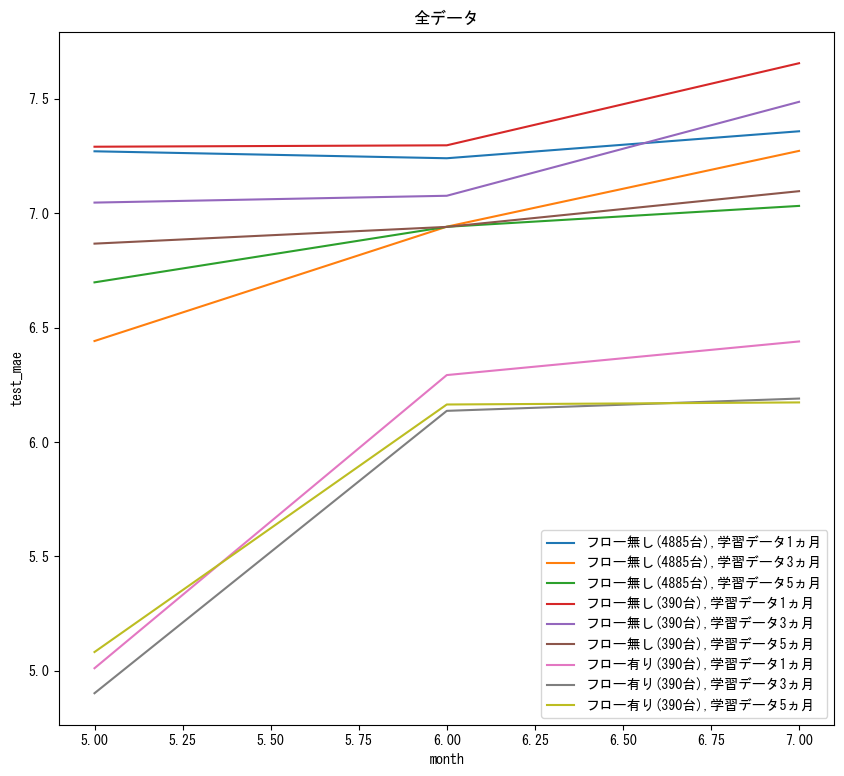

In [54]:
fig = plt.figure(figsize=(10,9))
for (kind,flo,duration),group in combined_df.groupby(['load_data_kind', 'use_flo_unique_features','duration_months']):
    if flo:
        label1 = "有り"
    else:
        label1 = "無し"
    if kind == "load_data1":
        label2 = "4885"
    elif kind == "load_data2":
        label2 = "390"

    group.sort_values(by="test_month",inplace=True)
    label = f"フロー{label1}({label2}台),学習データ{duration}ヵ月"
    plt.rcParams['font.family'] = 'MS Gothic'
    plt.plot(group["test_month"],group["test_mae"]*100,label=label)

plt.title("全データ")
plt.xlabel("month")
plt.ylabel("test_mae")
plt.legend()
plt.show()